#### Tutorial and Lab 5

Step 1. Import pandas, numpy and scipy

In [1]:
import pandas as pd
import numpy as np
import scipy as scp

Step 2. import IRIS Dataset using requests
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [2]:
import requests
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
d = requests.get(iris)

In [3]:
with open("irisdata.csv", 'w') as f:
    f.write(d.text)
    

Step 3. Convert the data into pandas dataframe

In [4]:
df1 = pd.read_csv("irisdata.csv") #loading the data 
df1.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "flower_class"] #define the name fo the columns 
df1 = df1.sample(frac=1).reset_index(drop=True) #randomly reindex the data to avoid bias when training the data 

In [5]:
oneh_iris = {"setosa":(1,0,0), "versicolor":(0,1,0), "virginica":(0,0,1)} #encode the classes  - one hard vector - new labels 
enc  = {"Iris-setosa":2, "Iris-versicolor":1, "Iris-virginica":0}

Step 4. Assign names to the columns and then give them classes.

In [9]:
#Try these out. 
zero_col = [0]*len(df1)
df2 = df1[df1.columns[:4]]
len(df2), len(zero_col)
print(df1)

     sepal_length  sepal_width  petal_length  petal_width     flower_class
0             6.5          2.8           4.6          1.5  Iris-versicolor
1             4.8          3.4           1.6          0.2      Iris-setosa
2             5.8          2.7           5.1          1.9   Iris-virginica
3             6.0          2.2           5.0          1.5   Iris-virginica
4             5.4          3.7           1.5          0.2      Iris-setosa
..            ...          ...           ...          ...              ...
144           6.3          2.9           5.6          1.8   Iris-virginica
145           7.2          3.0           5.8          1.6   Iris-virginica
146           5.2          3.4           1.4          0.2      Iris-setosa
147           6.4          2.8           5.6          2.2   Iris-virginica
148           4.6          3.2           1.4          0.2      Iris-setosa

[149 rows x 5 columns]


**Task 1.** Convert categorical values to numerical values in the dataframe. 

In [10]:
df1['flower_class'].replace(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'],
                        [1, 2, 3], inplace=True)

In [11]:
print(df1)

     sepal_length  sepal_width  petal_length  petal_width  flower_class
0             6.5          2.8           4.6          1.5             1
1             4.8          3.4           1.6          0.2             2
2             5.8          2.7           5.1          1.9             3
3             6.0          2.2           5.0          1.5             3
4             5.4          3.7           1.5          0.2             2
..            ...          ...           ...          ...           ...
144           6.3          2.9           5.6          1.8             3
145           7.2          3.0           5.8          1.6             3
146           5.2          3.4           1.4          0.2             2
147           6.4          2.8           5.6          2.2             3
148           4.6          3.2           1.4          0.2             2

[149 rows x 5 columns]


**Task 2.** Split the dataframe into train and test sets: (X_tr,y_tr) and (X_ts,y_ts). 


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.model_selection import train_test_split 

X = df1.drop(['flower_class'], axis='columns')
y = df1['flower_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0      1
1      2
2      3
3      3
4      2
      ..
144    3
145    3
146    2
147    3
148    2
Name: flower_class, Length: 149, dtype: int64


In [17]:
#Train the classifier. 
neighb = KNeighborsClassifier(n_neighbors=3) 
neighb.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
#Test the classifier
neighb.score(X_test, y_test)
y_pred = neighb.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Task 3.** Choose the two features *sepal_length* and *sepal_width* and plot them using **matplotlib**. 

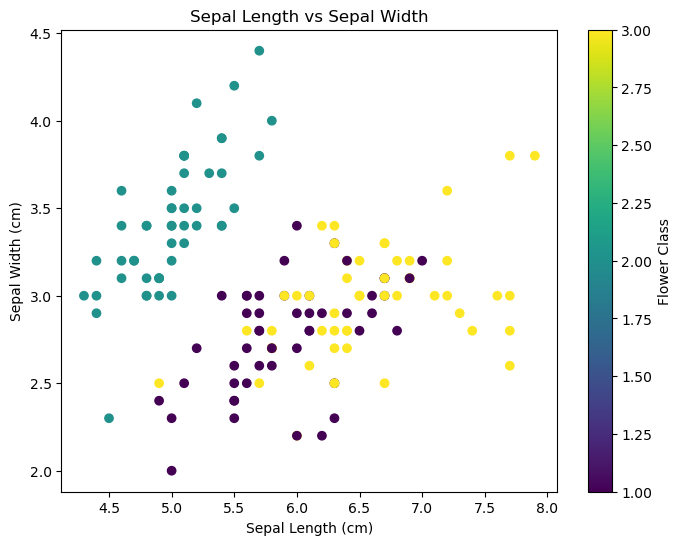

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Scatter plot of sepal_length vs sepal_width
plt.scatter(df1['sepal_length'], df1['sepal_width'], c=df1['flower_class'], cmap='viridis')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# Optionally, add a colorbar to show the flower class mapping
plt.colorbar(label='Flower Class')

plt.show()

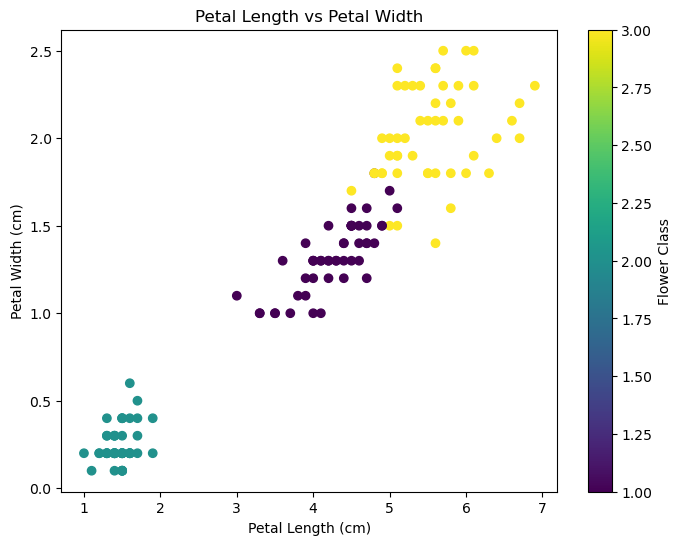

In [30]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Scatter plot of petal_length vs petal_width
plt.scatter(df1['petal_length'], df1['petal_width'], c=df1['flower_class'], cmap='viridis')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

# Optionally, add a colorbar to show the flower class mapping
plt.colorbar(label='Flower Class')

plt.show()